# <center><b> <em> Data Preprocessing </em> </b></center>

## <font color="green"> | - Import des Biblio et Dataframe</font>

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

In [65]:
#df = pd.read_csv("../data/bronze.csv", delimiter=";")
df = pd.read_csv("../data/bronze_data.csv", delimiter=";")
df.head()

,date_heure,date,heure,code_insee_region,region,consommation_brute_gaz_grtgaz,statut_grtgaz,consommation_brute_gaz_terega,statut_terega,consommation_brute_gaz_totale,consommation_brute_electricite_rte,statut_rte,consommation_brute_totale
0,2013-01-21T09:00:00+01:00,2013-01-21,09:00,11,Île-de-France,4129.0,Définitif,NaN,NaN,4129.0,13610,Définitif,17739.0
1,2013-01-21T09:00:00+01:00,2013-01-21,09:00,24,Centre-Val de Loire,4871.0,Définitif,NaN,NaN,4871.0,3589,Définitif,8460.0
2,2013-01-21T09:00:00+01:00,2013-01-21,09:00,44,Grand Est,17598.0,Définitif,NaN,NaN,17598.0,7306,Définitif,24904.0
3,2013-01-21T09:00:00+01:00,2013-01-21,09:00,76,Occitanie,2036.0,Définitif,4376.0,Définitif,6412.0,6722,Définitif,13134.0
4,2013-01-21T09:00:00+01:00,2013-01-21,09:00,84,Auvergne-Rhône-Alpes,14353.0,Définitif,94.0,Définitif,14447.0,10986,Définitif,25433.0


Description du fichier

    Date - Heure: date_heure[datetime]
    Date: date[date]
    Heure: heure[text]
    Code INSEE région: code_insee_region[text]
    Région: region[text]
    Consommation brute gaz (MW PCS 0°C) - GRTgaz: consommation_brute_gaz_grtgaz[int] Consommation brute régionale de gaz au pas horaire en MW PCS 0°C au périmètre GRTgaz
    Statut - GRTgaz: statut_grtgaz[text]
    Consommation brute gaz (MW PCS 0°C) - Teréga: consommation_brute_gaz_terega[int] Consommation brute régionale de gaz au pas horaire en MW PCS 0°C au périmètre Teréga
    Statut - Teréga: statut_terega[text]
    Consommation brute gaz totale (MW PCS 0°C): consommation_brute_gaz_totale[int] Consommation brute régionale de gaz au pas horaire en MW PCS 0°C
    Consommation brute électricité (MW) - RTE: consommation_brute_electricite_rte[int] Consommation brute régionale d’électricité au pas 30 minutes en MW
    Statut - RTE: statut_rte[text]
    Consommation brute totale (MW): consommation_brute_totale[int] Consommation brute régionale totale au pas horaire en MW


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207796 entries, 0 to 2207795
Data columns (total 13 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   date_heure                          object 
 1   date                                object 
 2   heure                               object 
 3   code_insee_region                   int64  
 4   region                              object 
 5   consommation_brute_gaz_grtgaz       float64
 6   statut_grtgaz                       object 
 7   consommation_brute_gaz_terega       float64
 8   statut_terega                       object 
 9   consommation_brute_gaz_totale       float64
 10  consommation_brute_electricite_rte  int64  
 11  statut_rte                          object 
 12  consommation_brute_totale           float64
dtypes: float64(4), int64(2), object(7)
memory usage: 219.0+ MB


In [67]:
df.shape

(2207796, 13)

In [68]:
# Convertir la colonne "date_heure" en un objet datetime
df['date_heure'] = pd.to_datetime(df['date_heure'])

In [69]:
# Convertir la colonne "date_heure" en un objet datetime
df['date'] = pd.to_datetime(df['date'])

In [70]:
df.isnull().sum()

date_heure                                  0
date                                        0
heure                                       0
code_insee_region                           0
region                                      0
consommation_brute_gaz_grtgaz         1121532
statut_grtgaz                         1103964
consommation_brute_gaz_terega         1931823
statut_terega                         1931822
consommation_brute_gaz_totale         1121533
consommation_brute_electricite_rte          0
statut_rte                                  0
consommation_brute_totale             1121533
dtype: int64

In [71]:
df['consommation_brute_gaz_grtgaz'].interpolate(method='linear', inplace=True)

In [72]:
df['consommation_brute_gaz_totale'].interpolate(method='linear', inplace=True)


In [73]:
df['consommation_brute_gaz_terega'].interpolate(method='linear', inplace=True)


In [74]:
df['consommation_brute_totale'].interpolate(method='linear', inplace=True)

In [75]:
df.isnull().sum()

date_heure                                  0
date                                        0
heure                                       0
code_insee_region                           0
region                                      0
consommation_brute_gaz_grtgaz               0
statut_grtgaz                         1103964
consommation_brute_gaz_terega               3
statut_terega                         1931822
consommation_brute_gaz_totale               0
consommation_brute_electricite_rte          0
statut_rte                                  0
consommation_brute_totale                   0
dtype: int64

In [76]:
import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize'] = 10000


In [77]:
df.head()

,date_heure,date,heure,code_insee_region,region,consommation_brute_gaz_grtgaz,statut_grtgaz,consommation_brute_gaz_terega,statut_terega,consommation_brute_gaz_totale,consommation_brute_electricite_rte,statut_rte,consommation_brute_totale
0,2013-01-21 09:00:00+01:00,2013-01-21,09:00,11,Île-de-France,4129.0,Définitif,NaN,NaN,4129.0,13610,Définitif,17739.0
1,2013-01-21 09:00:00+01:00,2013-01-21,09:00,24,Centre-Val de Loire,4871.0,Définitif,NaN,NaN,4871.0,3589,Définitif,8460.0
2,2013-01-21 09:00:00+01:00,2013-01-21,09:00,44,Grand Est,17598.0,Définitif,NaN,NaN,17598.0,7306,Définitif,24904.0
3,2013-01-21 09:00:00+01:00,2013-01-21,09:00,76,Occitanie,2036.0,Définitif,4376.0,Définitif,6412.0,6722,Définitif,13134.0
4,2013-01-21 09:00:00+01:00,2013-01-21,09:00,84,Auvergne-Rhône-Alpes,14353.0,Définitif,94.0,Définitif,14447.0,10986,Définitif,25433.0


### 1) A l’aide de pandas et matplotlib, affichez la série temporelle en utilisant comme abscisse la date_heure.

(array([15340., 16071., 16801., 17532., 18262., 18993., 19723.]),
 [Text(15340.0, 0, '2012'),
  Text(16071.0, 0, '2014'),
  Text(16801.0, 0, '2016'),
  Text(17532.0, 0, '2018'),
  Text(18262.0, 0, '2020'),
  Text(18993.0, 0, '2022'),
  Text(19723.0, 0, '2024')])

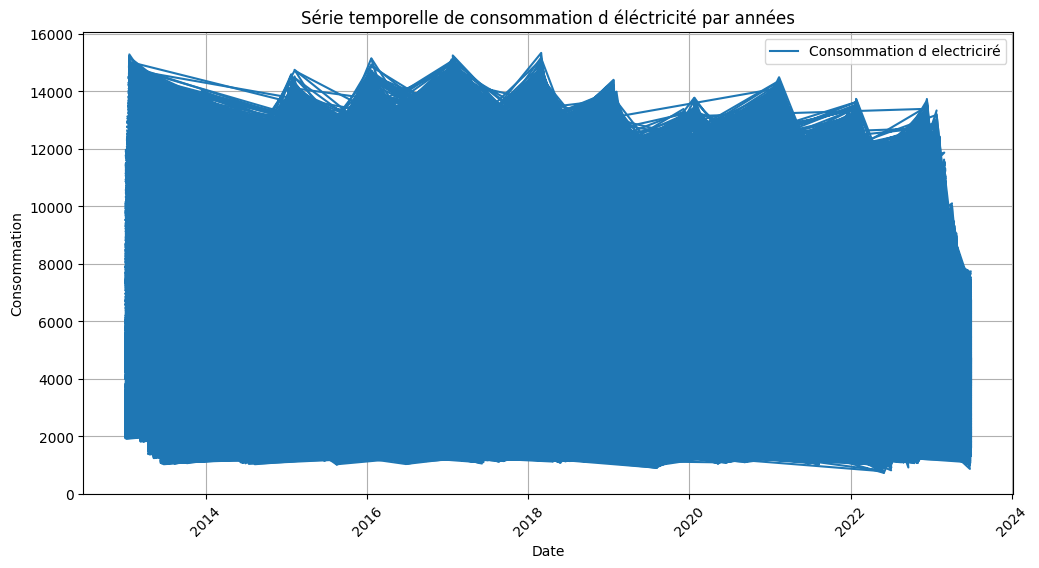

In [81]:
import matplotlib.pyplot as plt

# Créez le graphique
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['consommation_brute_electricite_rte'], label='Consommation d electriciré')
plt.xlabel('Date')
plt.ylabel('Consommation')
plt.title('Série temporelle de consommation d éléctricité par années')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)

### 2) Affichez cette même série temporelle en rassemblant:
Par année
Par trimestre
Par mois
Par semaine
Par jour


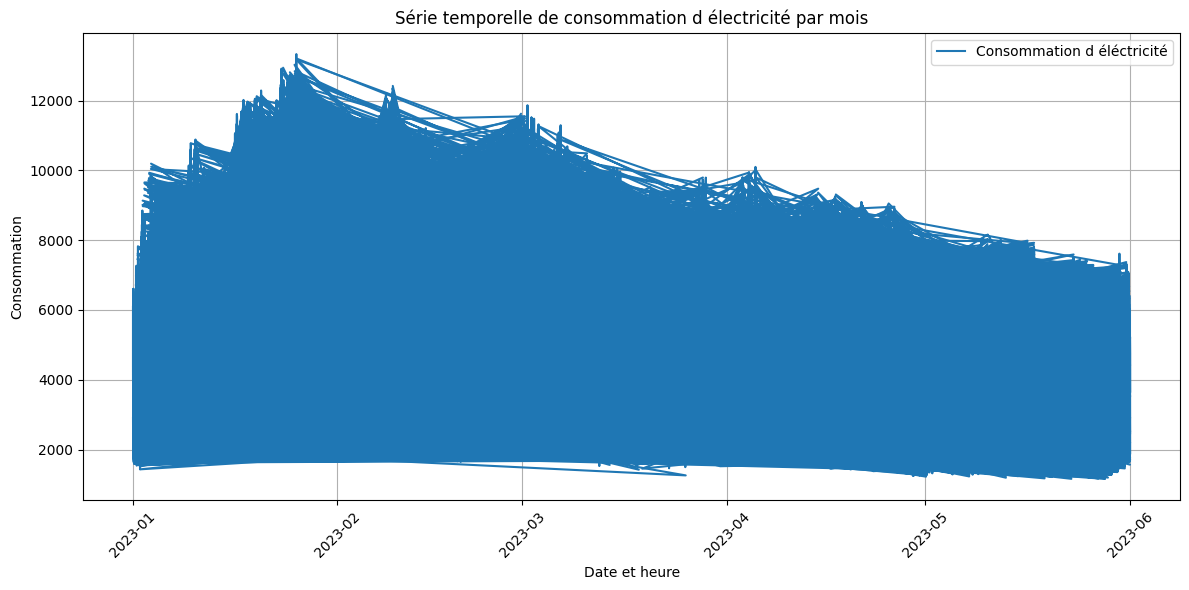

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Assurez-vous que start_date et end_date sont des objets datetime
start_date = pd.to_datetime('2023-01-01', utc=True)
end_date = pd.to_datetime('2023-06-01', utc=True)

# Filtrer les données pour la période spécifiée
filtered_data = df[(df['date_heure'] >= start_date) & (df['date_heure'] < end_date)]

# Créer le graphique
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['date_heure'], filtered_data['consommation_brute_electricite_rte'], label='Consommation d éléctricité')
plt.xlabel('Date et heure')
plt.ylabel('Consommation')
plt.title('Série temporelle de consommation d électricité par mois')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)

# Afficher le graphique
plt.tight_layout()
plt.show()


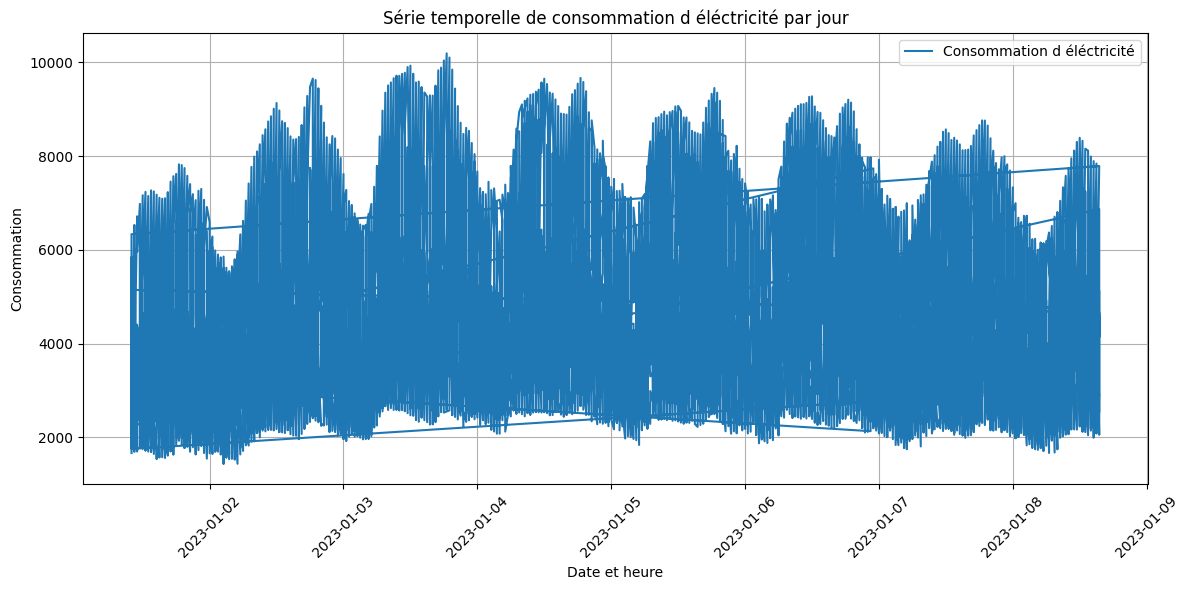

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assurez-vous que start_date et end_date sont des objets datetime
start_date = pd.to_datetime('2023-01-01 09:00:00', utc=True)
end_date = pd.to_datetime('2023-01-08 15:00:00', utc=True)

# Filtrer les données pour la période spécifiée
filtered_data = df[(df['date_heure'] >= start_date) & (df['date_heure'] < end_date)]

# Créer le graphique
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['date_heure'], filtered_data['consommation_brute_electricite_rte'], label='Consommation d éléctricité')
plt.xlabel('Date et heure')
plt.ylabel('Consommation')
plt.title('Série temporelle de consommation d éléctricité par jour')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)

# Afficher le graphique
plt.tight_layout()
plt.show()


/tmp/ipykernel_7171/3638798976.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_data = df.resample('W').mean()


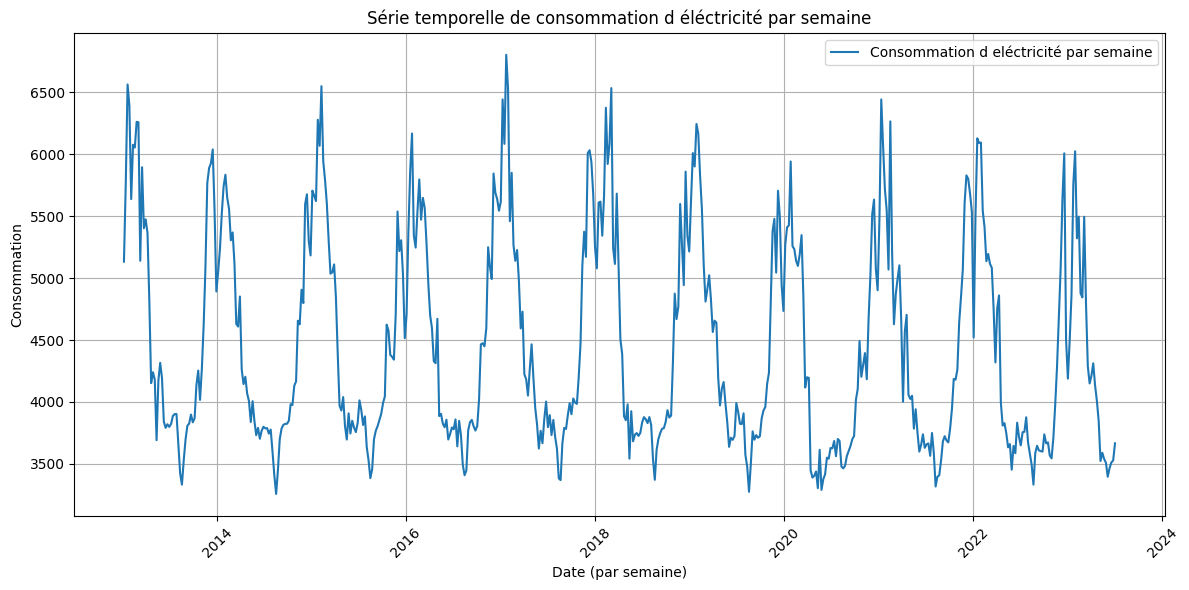

In [ ]:


# Définir la fréquence d'échantillonnage par semaine
weekly_data = df.resample('W').mean()

# Créer le graphique pour la consommation de gaz par semaine
plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data['consommation_brute_electricite_rte'], label='Consommation d eléctricité par semaine')
plt.xlabel('Date (par semaine)')
plt.ylabel('Consommation')
plt.title('Série temporelle de consommation d éléctricité par semaine')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)

# Afficher le graphique par semaine
plt.tight_layout()
plt.show()

/tmp/ipykernel_7171/2412363437.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quarterly_data = df.resample('Q').mean()


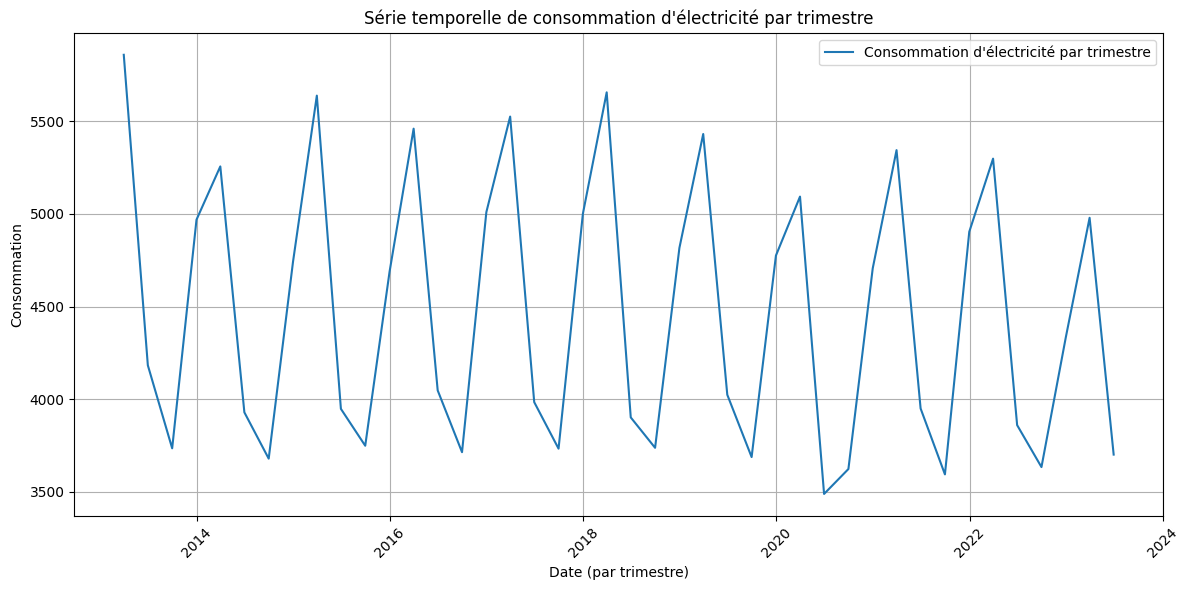

In [ ]:

# Définir la fréquence d'échantillonnage par trimestre (3 mois)
quarterly_data = df.resample('Q').mean()

# Créer le graphique pour la consommation d'électricité par trimestre
plt.figure(figsize=(12, 6))
plt.plot(quarterly_data.index, quarterly_data['consommation_brute_electricite_rte'], label='Consommation d\'électricité par trimestre')
plt.xlabel('Date (par trimestre)')
plt.ylabel('Consommation')
plt.title('Série temporelle de consommation d\'électricité par trimestre')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)

# Afficher le graphique par trimestre
plt.tight_layout()
plt.show()

### 3) A partir de la time série agrégée à la journée, créez une moyenne mobile sur une semaine, centrée et symétrique.

/tmp/ipykernel_7171/3746923011.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_data = df.resample('w').mean()


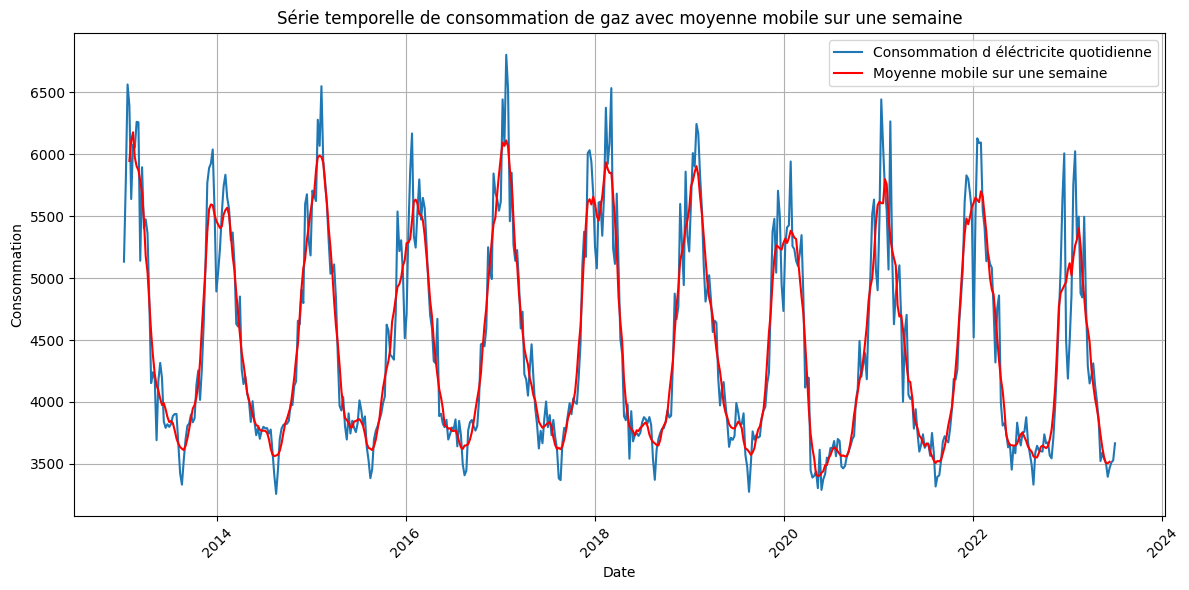

In [ ]:
# Définir la fréquence d'échantillonnage par jour
daily_data = df.resample('w').mean()

# Calculer la moyenne mobile sur une semaine centrée et symétrique
rolling_weekly_mean = daily_data['consommation_brute_electricite_rte'].rolling(window=7, center=True).mean()

# Créer le graphique pour la moyenne mobile
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['consommation_brute_electricite_rte'], label='Consommation d éléctricite quotidienne')
plt.plot(rolling_weekly_mean.index, rolling_weekly_mean, label='Moyenne mobile sur une semaine', color='red')
plt.xlabel('Date')
plt.ylabel('Consommation')
plt.title('Série temporelle de consommation d electricité avec moyenne mobile sur une semaine')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)

# Afficher le graphique avec la moyenne mobile
plt.tight_layout()
plt.show()


### 4) Quelle est la différence entre la moyenne mobile et les agrégations précédentes?

La principale différence entre la moyenne mobile et les agrégations précédentes (comme l'agrégation quotidienne ou trimestrielle) réside dans la manière dont elles traitent les données temporelles et l'objectif de chacune d'elles :

    Agrégations (quotidiennes, trimestrielles, etc.) :
        Les agrégations consistent à regrouper les données sur une période de temps donnée (par exemple, par jour, par trimestre) et à effectuer une opération (telle que la moyenne, la somme, etc.) sur les valeurs de cette période.
        Elles réduisent la résolution temporelle des données, ce qui signifie que vous obtenez une vue d'ensemble sur des périodes plus longues, ce qui peut aider à détecter des tendances à plus long terme.
        Cependant, elles ne lissent pas nécessairement les fluctuations à court terme. Les variations à court terme sont toujours visibles dans les données agrégées.

    Moyenne Mobile :
        La moyenne mobile consiste à calculer la moyenne des données sur une fenêtre de temps glissante. La fenêtre de temps est centrée autour de chaque point de données, de sorte qu'elle lisse les fluctuations à court terme.
        Elle est utilisée pour atténuer le bruit et mettre en évidence les tendances à moyen terme dans les données.
        La moyenne mobile est particulièrement utile pour identifier des modèles de variation à moyen terme et pour rendre les données plus lisses et plus faciles à interpréter.

En résumé, les agrégations sont principalement utilisées pour réduire la résolution temporelle des données et obtenir une vue d'ensemble sur des périodes plus longues, tandis que la moyenne mobile est utilisée pour lisser les données en atténuant les fluctuations à court terme et en mettant en évidence les tendances à moyen terme. Le choix entre les deux dépend de l'objectif de votre analyse et de la façon dont vous souhaitez interpréter les données temporelles.

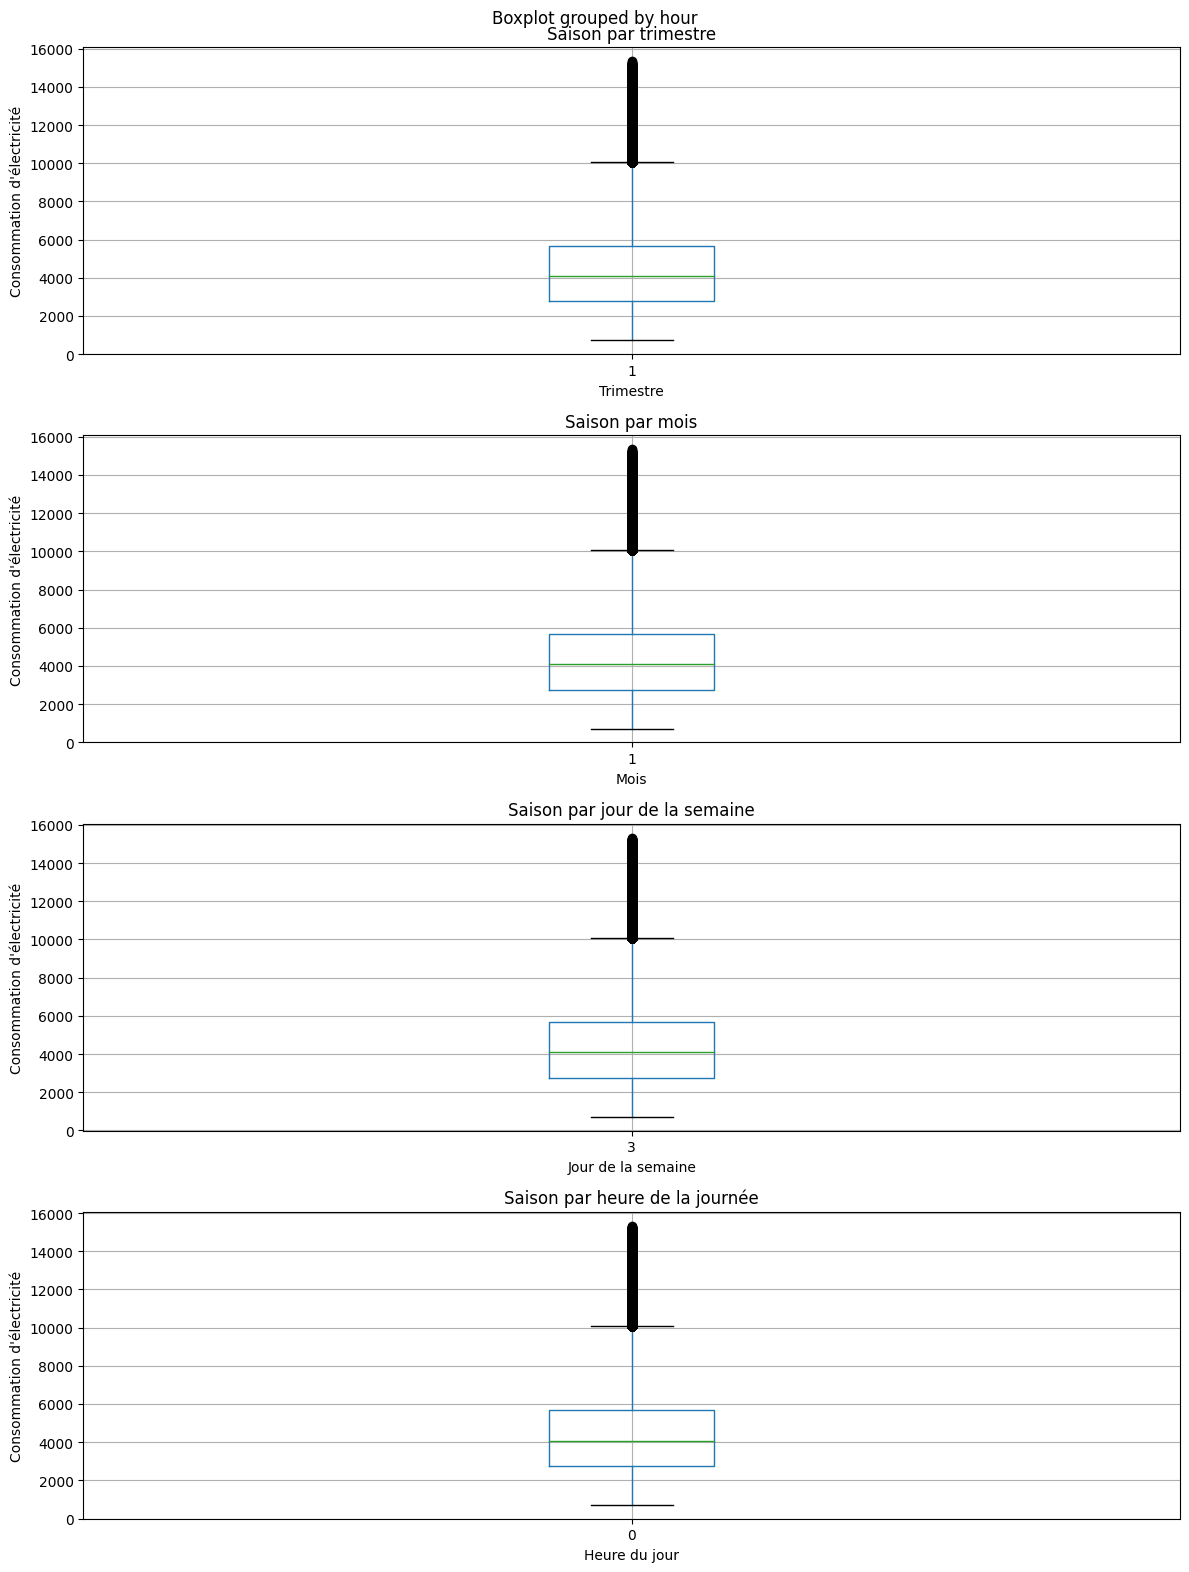

In [84]:

# Assurez-vous que l'index est de type DatetimeIndex
df.index = pd.to_datetime(df.index)

# Créer une figure avec plusieurs sous-graphiques
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 16))

# Saison par trimestre
df['quarter'] = df.index.quarter
df.boxplot(column='consommation_brute_electricite_rte', by='quarter', ax=axes[0])
axes[0].set_title('Saison par trimestre')
axes[0].set_xlabel('Trimestre')
axes[0].set_ylabel('Consommation d\'électricité')

# Saison par mois
df['month'] = df.index.month
df.boxplot(column='consommation_brute_electricite_rte', by='month', ax=axes[1])
axes[1].set_title('Saison par mois')
axes[1].set_xlabel('Mois')
axes[1].set_ylabel('Consommation d\'électricité')

# Saison par semaine (chaque jour de la semaine)
df['day_of_week'] = df.index.dayofweek
df.boxplot(column='consommation_brute_electricite_rte', by='day_of_week', ax=axes[2])
axes[2].set_title('Saison par jour de la semaine')
axes[2].set_xlabel('Jour de la semaine')
axes[2].set_ylabel('Consommation d\'électricité')

# Saison par heure
df['hour'] = df.index.hour
df.boxplot(column='consommation_brute_electricite_rte', by='hour', ax=axes[3])
axes[3].set_title('Saison par heure de la journée')
axes[3].set_xlabel('Heure du jour')
axes[3].set_ylabel('Consommation d\'électricité')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les box-plots
plt.show()